In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as ss

In [4]:
detail=pd.read_csv('/content/online_course_engagement_data.csv')

In [5]:
detail.head()


,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [6]:
detail.isnull().sum()

,0
UserID,0
CourseCategory,0
TimeSpentOnCourse,0
NumberOfVideosWatched,0
NumberOfQuizzesTaken,0
QuizScores,0
CompletionRate,0
DeviceType,0
CourseCompletion,0


In [7]:
detail.shape

(9000, 9)

In [8]:
x=detail.iloc[:,[2,6]].values
print(x)

[[29.97971935 20.86077271]
 [27.80263951 65.63241524]
 [86.8204847  63.81200659]
 ...
 [38.21251152 70.18815868]
 [70.04866546 72.97522521]
 [93.58978113 11.29907109]]


In [9]:
wcss=[]
for i in range(1,11):
   kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
   kmeans.fit(x)
   wcss.append(kmeans.inertia_)

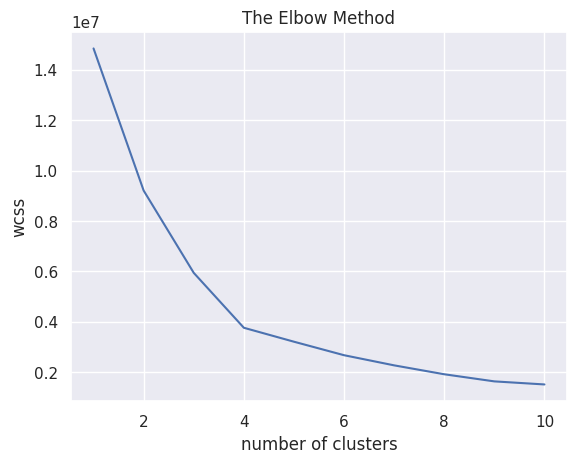

In [10]:
ss.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

[3 0 2 ... 0 2 1]


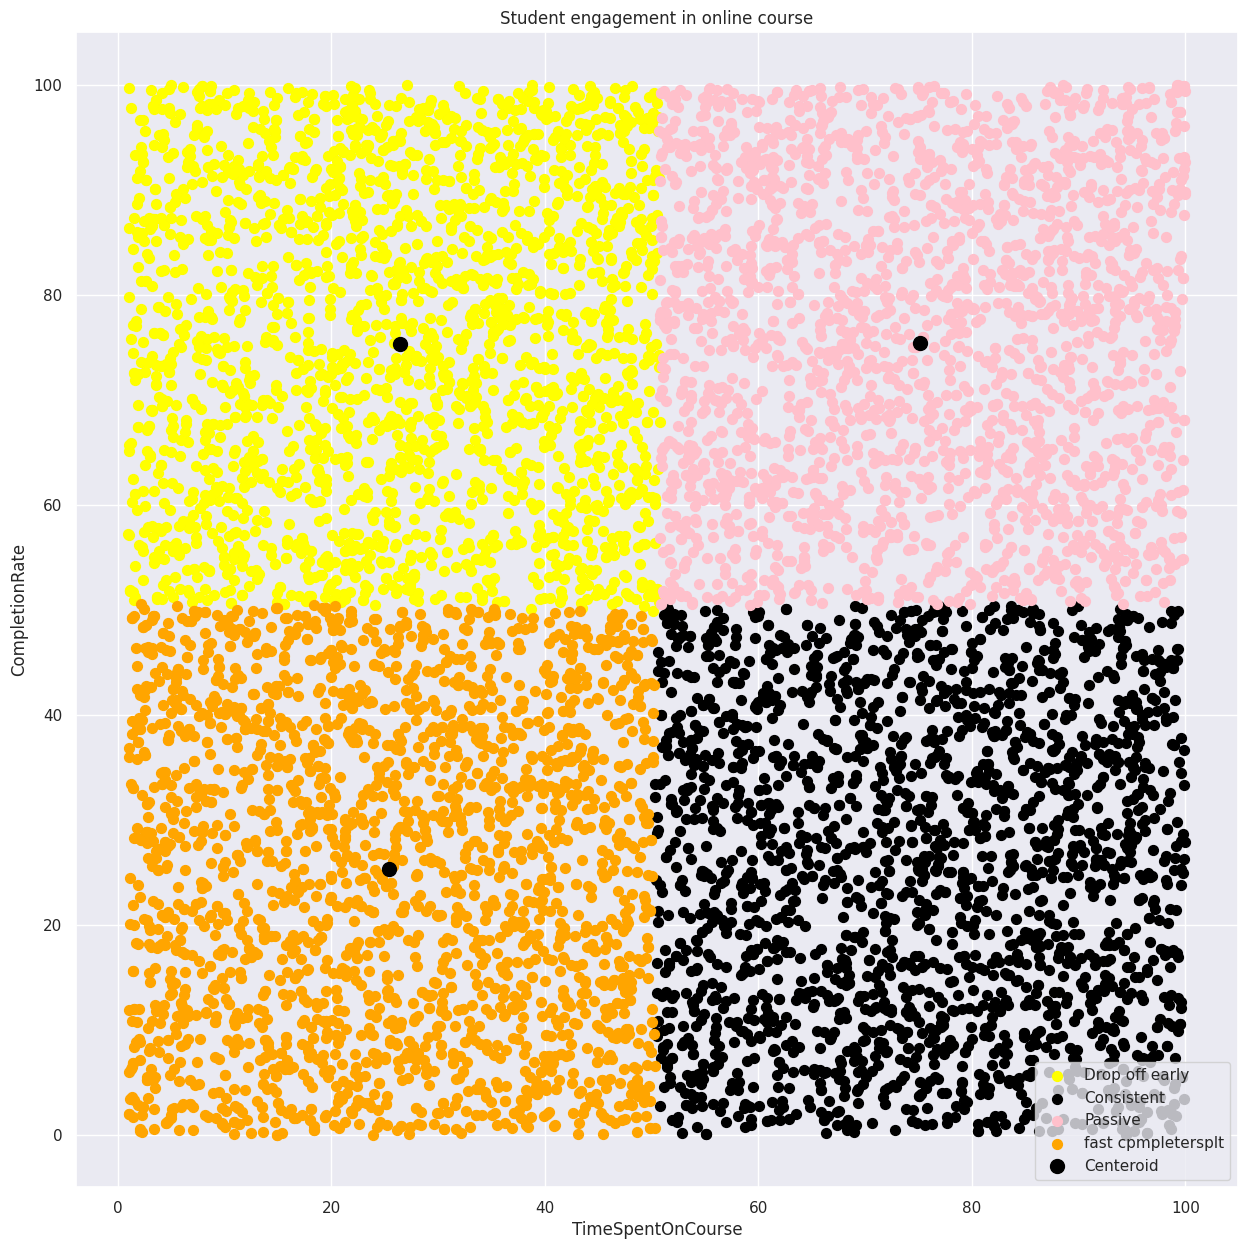

In [11]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y=kmeans.fit_predict(x)
print(y)
plt.figure(figsize = (15,15))
plt.scatter(x[y == 0,0],x[y == 0,1],s = 50, c = 'yellow', label = 'Drop off early')
plt.scatter(x[y == 1,0],x[y == 1,1],s = 50, c = 'black', label = 'Consistent' )
plt.scatter(x[y == 2,0],x[y == 2,1],s = 50, c = 'pink', label = 'Passive' )
plt.scatter(x[y == 3,0],x[y == 3,1],s = 50, c = 'orange', label = 'fast cpmpletersplt' )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label = 'Centeroid')
plt.title('Student engagement in online course')
plt.xlabel('TimeSpentOnCourse')
plt.ylabel('CompletionRate')
plt.legend()
plt.show()